In [ ]:
! unzip /content/drive/MyDrive/datasets/clean_trainset_28spk_wav.zip
! unzip /content/drive/MyDrive/datasets/clean_testset_wav.zip
! unzip /content/drive/MyDrive/datasets/noisy_testset_wav.zip
! unzip /content/drive/MyDrive/datasets/noisy_trainset_28spk_wav.zip

Streaming output truncated to the last 5000 lines.
  inflating: noisy_trainset_28spk_wav/p267_421.wav  
  inflating: noisy_trainset_28spk_wav/p268_001.wav  
  inflating: noisy_trainset_28spk_wav/p268_002.wav  
  inflating: noisy_trainset_28spk_wav/p268_003.wav  
  inflating: noisy_trainset_28spk_wav/p268_004.wav  
  inflating: noisy_trainset_28spk_wav/p268_005.wav  
  inflating: noisy_trainset_28spk_wav/p268_006.wav  
  inflating: noisy_trainset_28spk_wav/p268_007.wav  
  inflating: noisy_trainset_28spk_wav/p268_009.wav  
  inflating: noisy_trainset_28spk_wav/p268_010.wav  
  inflating: noisy_trainset_28spk_wav/p268_011.wav  
  inflating: noisy_trainset_28spk_wav/p268_012.wav  
  inflating: noisy_trainset_28spk_wav/p268_013.wav  
  inflating: noisy_trainset_28spk_wav/p268_014.wav  
  inflating: noisy_trainset_28spk_wav/p268_015.wav  
  inflating: noisy_trainset_28spk_wav/p268_016.wav  
  inflating: noisy_trainset_28spk_wav/p268_017.wav  
  inflating: noisy_trainset_28spk_wav/p268_018.w

In [ ]:
! pip install wavinfo
! sudo apt install sox

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 631 kB 7.0 MB/s 
     |████████████████████████████████| 60 kB 5.6 MB/s 
     |████████████████████████████████| 109 kB 60.8 MB/s 
     |████████████████████████████████| 546 kB 52.6 MB/s 
  Created wheel for ear: filename=ear-2.1.0-py3-none-any.whl size=668352 sha256=f7cda04ac3c7c9db64b3ca74bb83d9ce03ada31bf92d4df13b90ddb6ba7b5d83
  Stored in directory: /root/.cache/pip/wheels/07/70/1e/67526c82388980847f2c15ea93273759428af4107715b642ac
Successfully built ear
  Attempting uninstall: attrs
    Found existing installation: attrs 22.1.0
    Uninstalling attrs-22.1.0:
      Successfully uninstalled attrs-22.1.0
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The follow

In [ ]:
import os
import pandas as pd
import numpy as np
import subprocess
import glob
import soundfile as sf
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import librosa
import wave
import pylab

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  del sys.path[0]


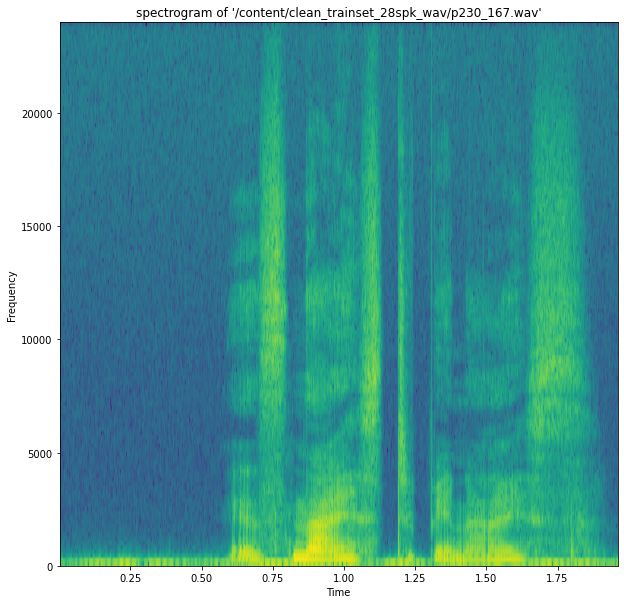

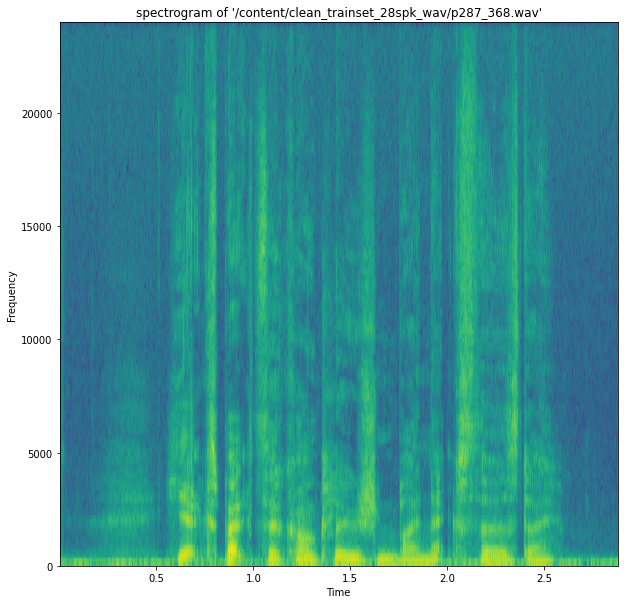

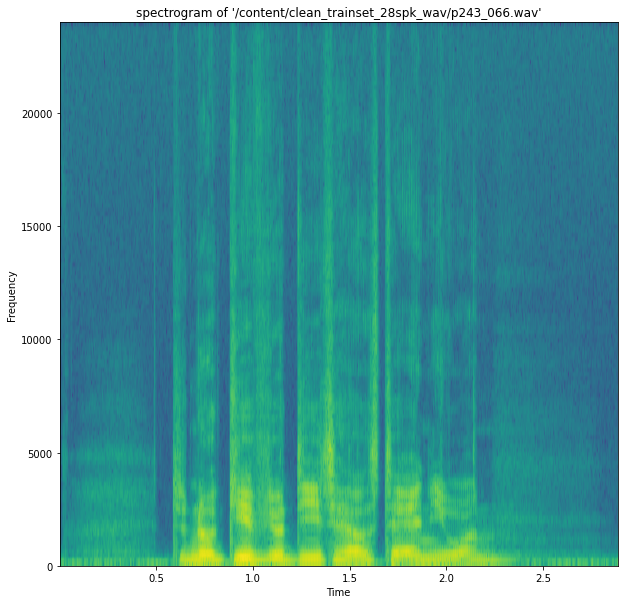

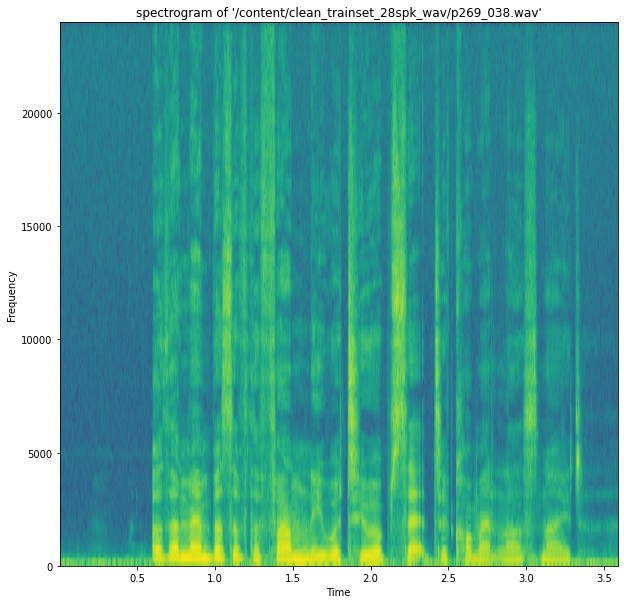

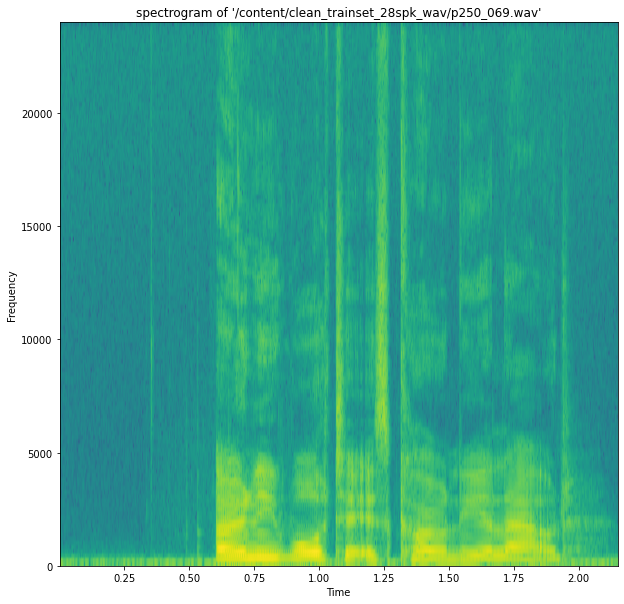

In [ ]:
def graph_spectrogram(wav_file):
    sound_info, frame_rate = get_wav_info(wav_file)
    pylab.figure(num=None, figsize=(10, 10))
    pylab.subplot(111)
    pylab.title('spectrogram of %r' % wav_file)
    pylab.specgram(sound_info, Fs=frame_rate)
    pylab.xlabel('Time')
    pylab.ylabel('Frequency')
    pylab.savefig('spectrogram.png')
def get_wav_info(wav_file):
    wav = wave.open(wav_file, 'r')
    frames = wav.readframes(-1)
    sound_info = pylab.fromstring(frames, 'int16')
    frame_rate = wav.getframerate()
    wav.close()
    return sound_info, frame_rate
for i in os.listdir("/content/clean_trainset_28spk_wav/")[0:5]:
    graph_spectrogram("/content/clean_trainset_28spk_wav/"+i)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  del sys.path[0]


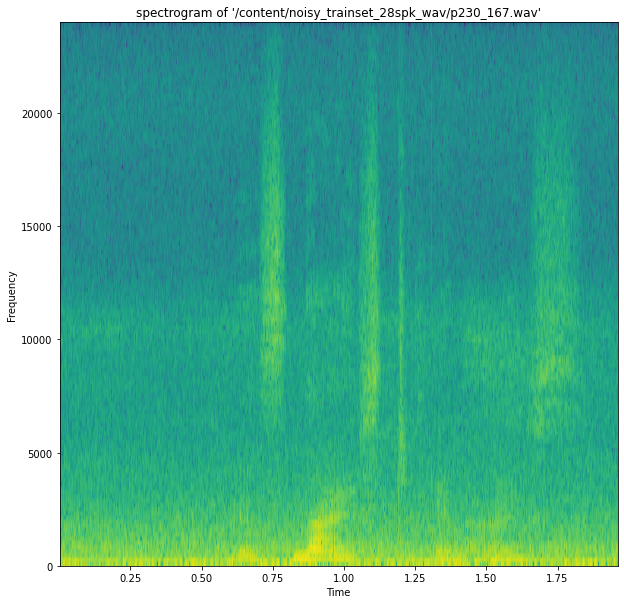

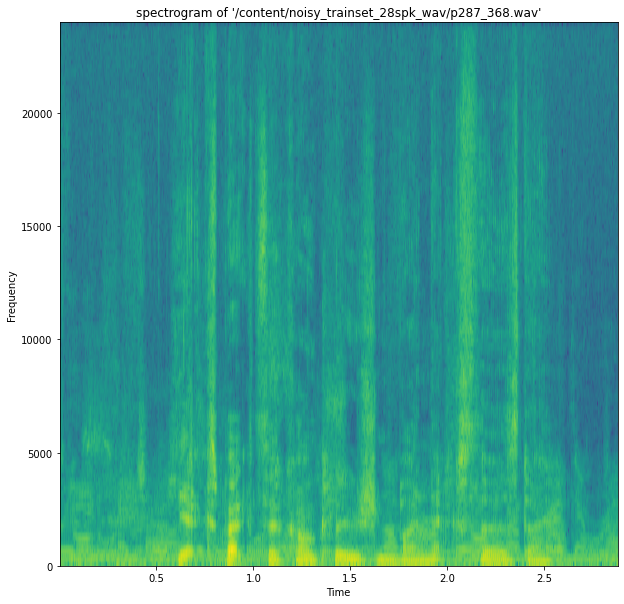

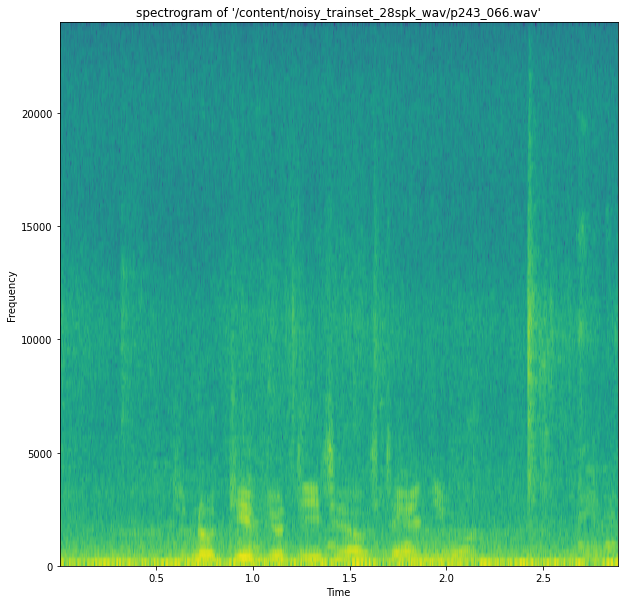

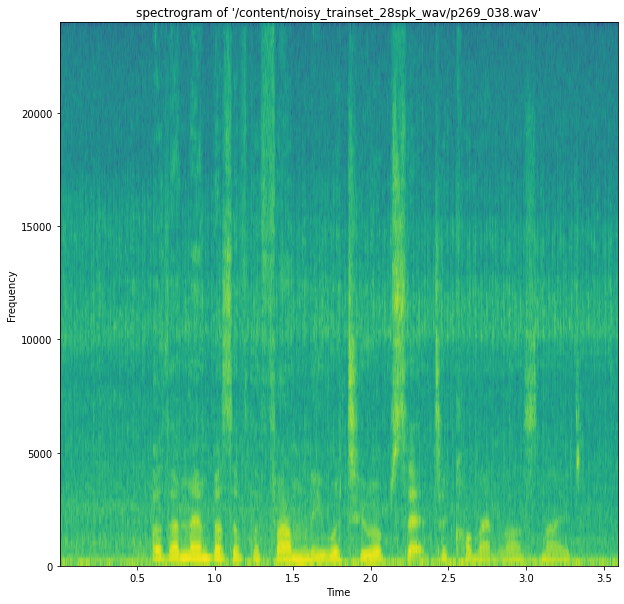

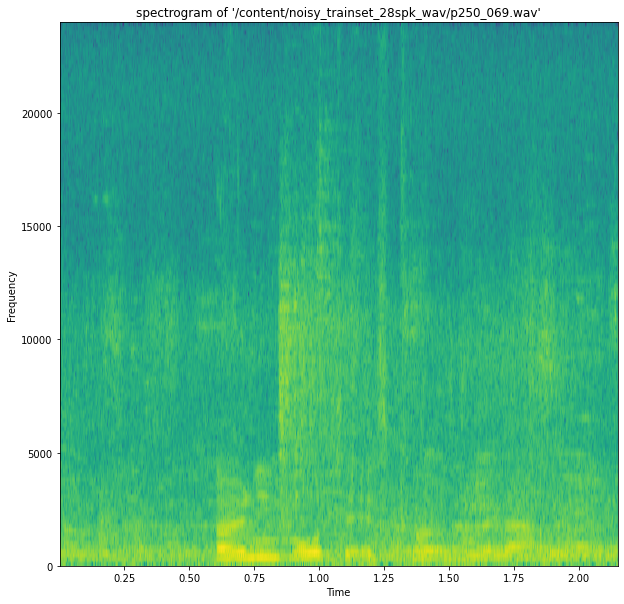

In [ ]:
for i in os.listdir("/content/noisy_trainset_28spk_wav/")[0:5]:
    graph_spectrogram("/content/noisy_trainset_28spk_wav/"+i)

In [ ]:
import sys
def waveform(wav_file):
  spf = wave.open(wav_file, "r")
  signal = spf.readframes(-1)
  signal = np.frombuffer(signal, dtype='int16')
  fs = spf.getframerate()
  # If Stereo
  if spf.getnchannels() == 2:
      print("Just mono files")
      sys.exit(0)
  Time = np.linspace(0, len(signal) / fs, num=len(signal))
  plt.figure(1)
  plt.figure(num=None, figsize=(15, 5))
  plt.title(wav_file)
  plt.xlabel('Time')
  plt.ylabel('Amplitude')
  plt.plot(Time, signal)
  plt.show()

<Figure size 432x288 with 0 Axes>

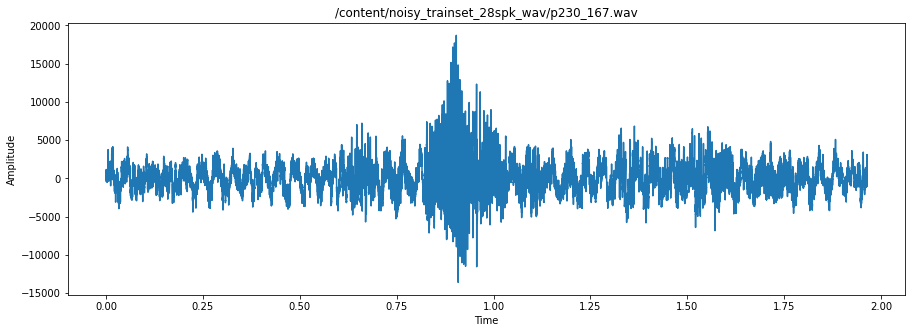

<Figure size 432x288 with 0 Axes>

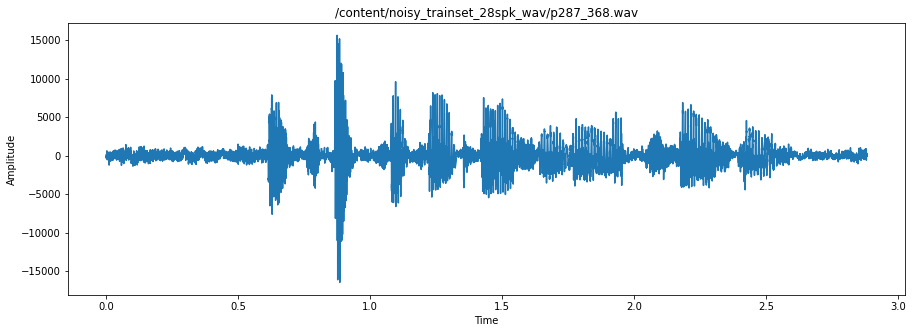

<Figure size 432x288 with 0 Axes>

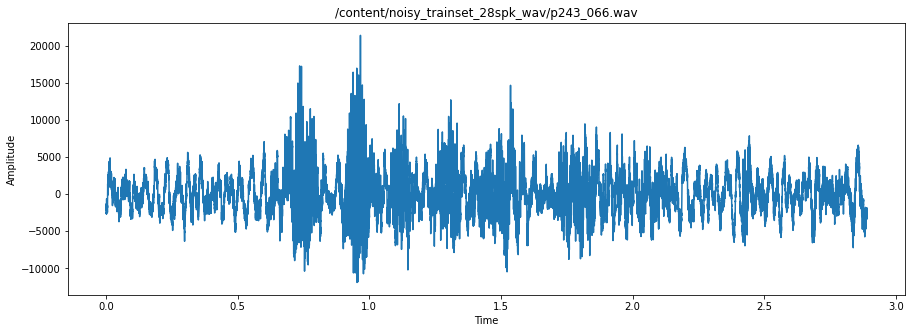

<Figure size 432x288 with 0 Axes>

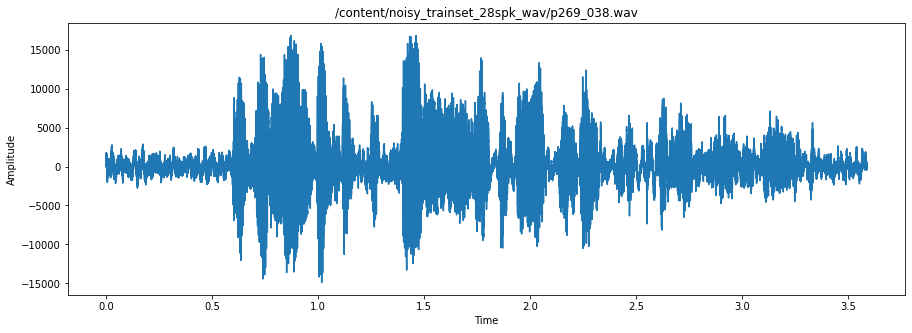

<Figure size 432x288 with 0 Axes>

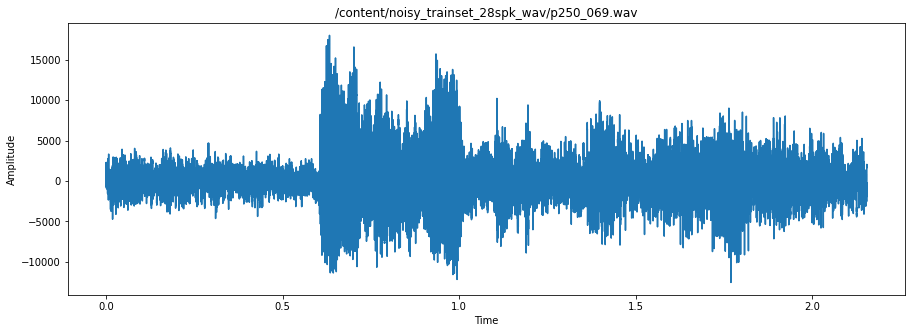

In [ ]:
for i in os.listdir("/content/noisy_trainset_28spk_wav/")[0:5]:
    waveform("/content/noisy_trainset_28spk_wav/"+i)

<Figure size 432x288 with 0 Axes>

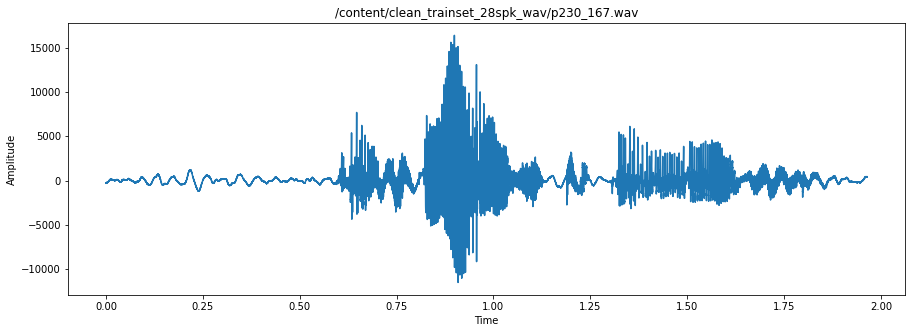

<Figure size 432x288 with 0 Axes>

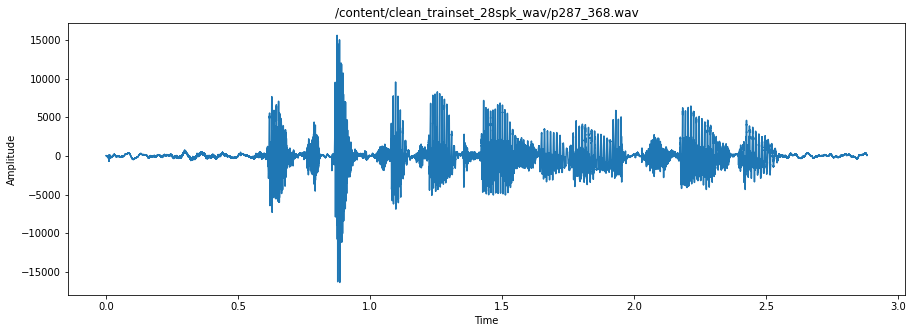

<Figure size 432x288 with 0 Axes>

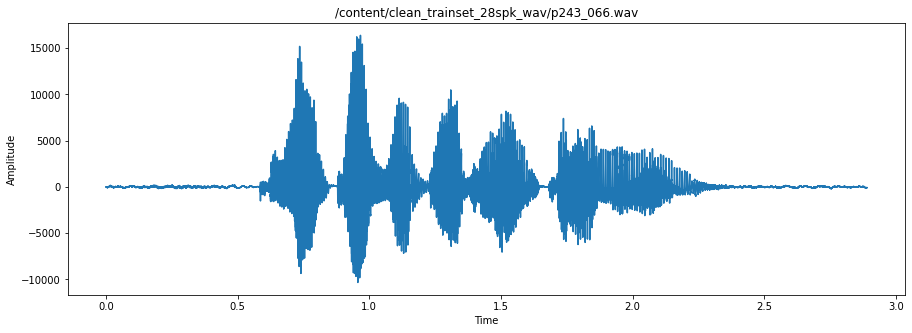

<Figure size 432x288 with 0 Axes>

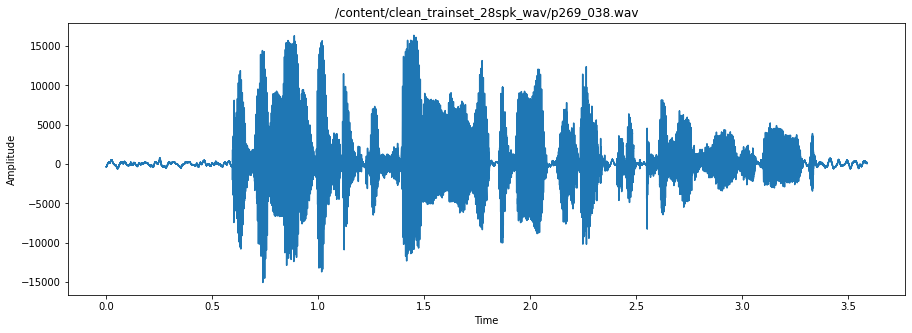

<Figure size 432x288 with 0 Axes>

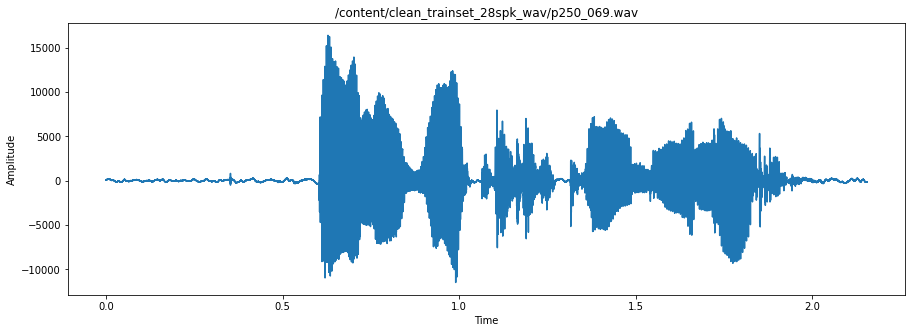

In [ ]:
for i in os.listdir("/content/clean_trainset_28spk_wav/")[0:5]:
    waveform("/content/clean_trainset_28spk_wav/"+i)

In [ ]:
import IPython.display as ipd  # To play sound in the notebook
import librosa
import librosa.display
!apt install -y ffmpeg

Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:3.4.11-0ubuntu0.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.


p230_167.wav
p287_368.wav
p243_066.wav
p269_038.wav
p250_069.wav


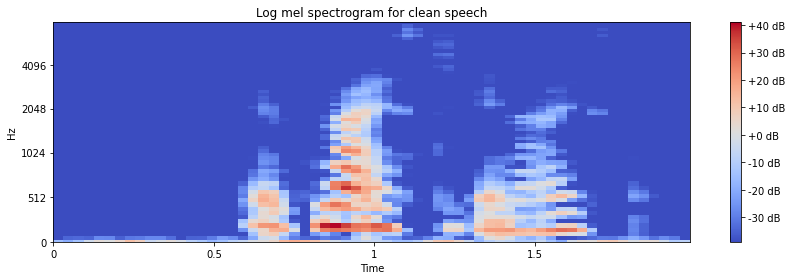

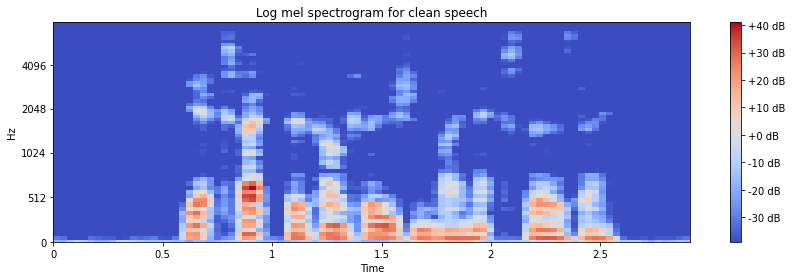

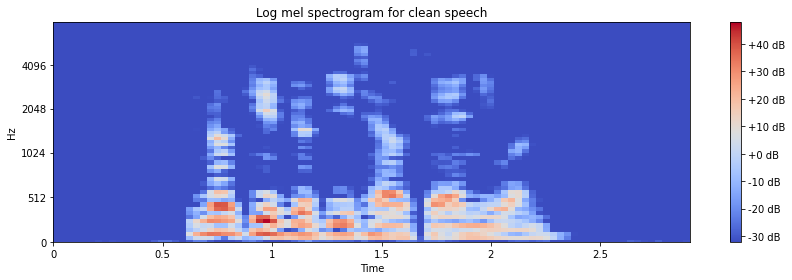

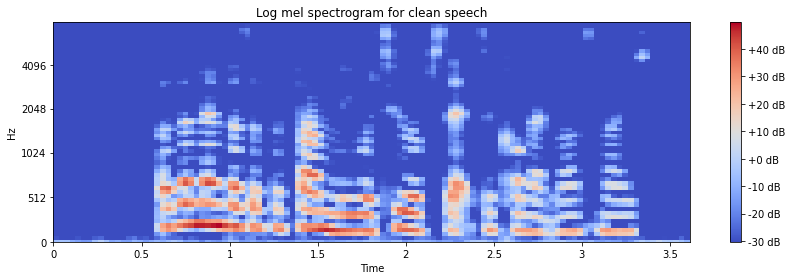

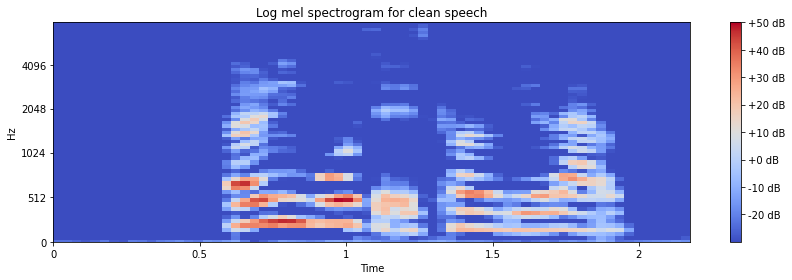

In [ ]:
for i in os.listdir("/content/clean_trainset_28spk_wav/")[0:5]:
  print(i)
  y, sr = librosa.load("/content/clean_trainset_28spk_wav/"+i,sr=16000) # Chop audio at 5 secs...
  melspec = librosa.feature.melspectrogram(y, sr, n_mels=64) # 5 MFCC components
  log_S = librosa.amplitude_to_db(melspec)

# Display the log mel spectrogram
  plt.figure(figsize=(12,4))
  librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')
  plt.title('Log mel spectrogram for clean speech')
  plt.colorbar(format='%+02.0f dB')
  plt.tight_layout()

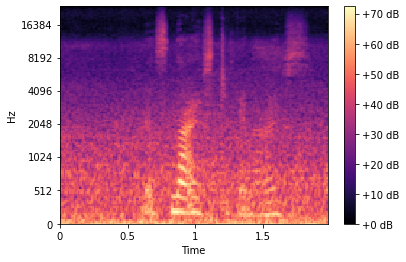

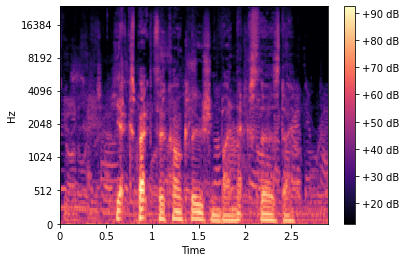

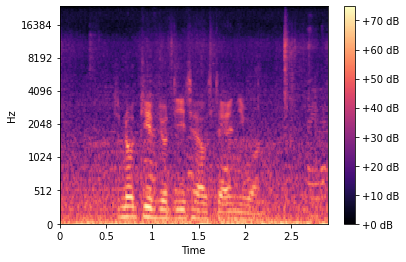

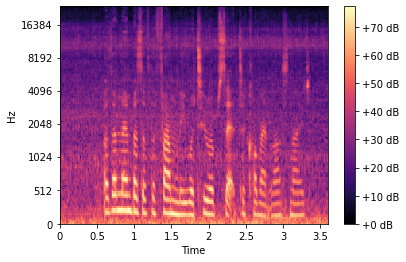

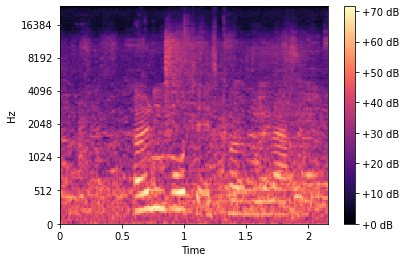

In [ ]:
for i in os.listdir("/content/noisy_trainset_28spk_wav/")[0:5]:

  samples, sample_rate = librosa.load("/content/noisy_trainset_28spk_wav/"+i, sr=None)
  sgram = librosa.stft(samples)
  #librosa.display.specshow(sgram)
  sgram_mag, _ = librosa.magphase(sgram)
  mel_scale_sgram = librosa.feature.melspectrogram(S=sgram_mag, sr=sample_rate)
  #librosa.display.specshow(mel_scale_sgram)
  mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.min)
  librosa.display.specshow(mel_sgram, sr=sample_rate, x_axis='time', y_axis='mel')
  plt.colorbar(format='%+2.0f dB')
  plt.show()

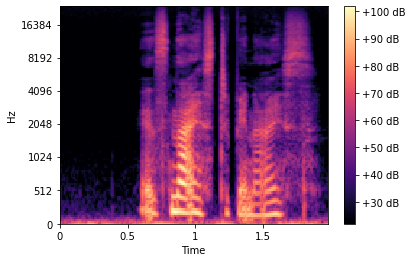

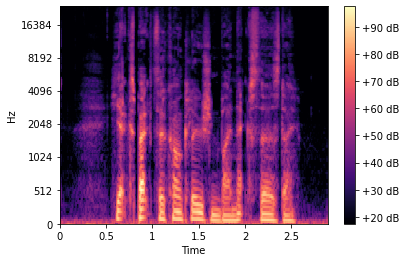

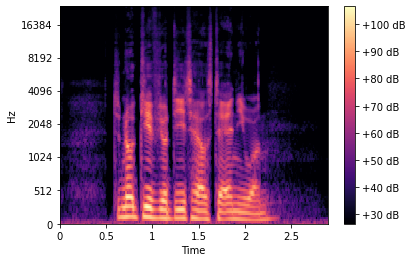

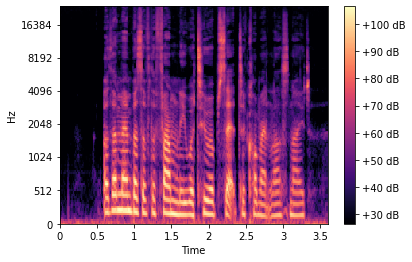

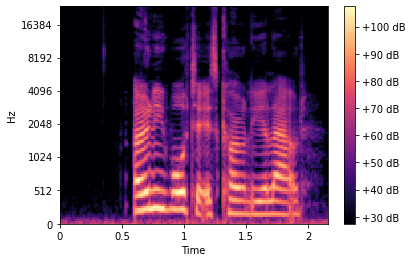

In [ ]:
for i in os.listdir("/content/clean_trainset_28spk_wav/")[0:5]:

  samples, sample_rate = librosa.load("/content/clean_trainset_28spk_wav/"+i, sr=None)
  sgram = librosa.stft(samples)
  #librosa.display.specshow(sgram)
  sgram_mag, _ = librosa.magphase(sgram)
  mel_scale_sgram = librosa.feature.melspectrogram(S=sgram_mag, sr=sample_rate)
  #librosa.display.specshow(mel_scale_sgram)
  mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.min)
  librosa.display.specshow(mel_sgram, sr=sample_rate, x_axis='time', y_axis='mel')
  plt.colorbar(format='%+2.0f dB')
  plt.show()

[[ 11.4176632  -11.20078694   6.95542201 ...   6.44874703   0.76684817
    3.90478162]
 [ 10.30416851 -23.89143346  31.93879553 ...  -0.67784358   3.21247932
    3.74386806]
 [ 10.30364795 -28.24649201  26.34148546 ...  17.83251316  14.56609637
   15.64718327]
 ...
 [ 10.66606801 -23.67036918  18.67967739 ...   8.57358056  13.38693253
   22.25990669]
 [ 10.69423966 -24.98702443  19.24410165 ...  13.02967201  20.68735768
   13.91772717]
 [ 10.69197592 -16.9775435   29.14541454 ...   1.11868565   5.06216088
    5.90286873]]


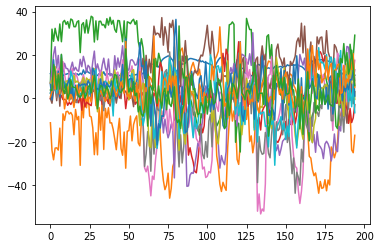

[[ 11.32555483 -19.79796058   8.27821312 ...  22.70956406   5.19957109
    0.47227917]
 [ 13.86013863 -32.91448381  -5.71792722 ...  14.81819283  14.79865664
    8.54550628]
 [ 10.55625357 -14.0004527   20.28693457 ...  18.71065588   4.90787815
    0.04479573]
 ...
 [ 10.88916646  -8.83197384  32.65396913 ...   5.57858818  -4.25578909
    1.40051608]
 [  9.98272712 -20.50896581  20.81161546 ...   0.83431814   4.21049504
    4.16255801]
 [ 10.41361231 -16.56498797  27.02211301 ...   5.28690964  -0.47350881
   -7.61502266]]


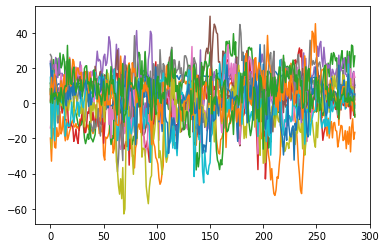

[[  8.53613636 -23.88709381  15.33987457 ...  15.82594271   1.02194967
   -5.12529238]
 [ 10.51998815 -22.2615688    1.44194338 ...  12.07039188  18.46970352
  -13.30492738]
 [  9.90322556 -15.63554043  -5.15870599 ...   1.59146345  15.49894614
   -5.74058115]
 ...
 [  8.39614401 -17.04313214  27.0635675  ...  10.60344926   7.80173192
    2.70334269]
 [  8.43926932 -16.71495199  28.20627211 ...   9.60260119  11.17613895
   11.25805703]
 [  8.13518243 -22.08551544  21.75338624 ...   7.20168015  -1.51533797
   -3.18965315]]


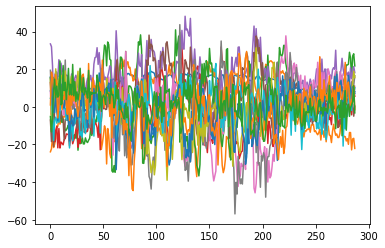

[[ 11.65508664 -10.61932066   8.69346022 ...   6.42937741   3.48709387
    3.51536542]
 [ 10.90921303 -19.48140865  30.83123477 ...   7.71442515  -6.25849069
   -5.98970891]
 [ 11.73692973 -24.22755855  32.99453437 ...  12.57113553   7.50906413
   11.11044883]
 ...
 [ 11.21713671  -6.717948    11.33093063 ...   2.22403202  10.10005445
   22.72389263]
 [ 11.05142806  -6.17421411  15.96601399 ...   4.47293622  10.47551533
   12.14980632]
 [ 11.40976828  -8.56415695  11.89976532 ... -13.82653418  13.32443725
   24.01702764]]


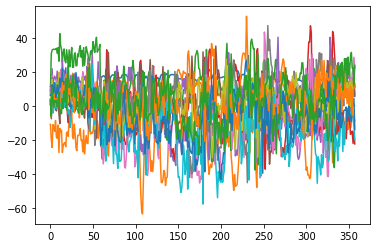

[[ 10.24175608 -18.11453693  12.53417605 ...  11.83249819   5.24875965
    6.93950858]
 [  9.60075343 -19.07440356  31.0689283  ...   0.86692231   1.65481118
    4.67698727]
 [  9.59391934 -13.15836209  34.02075921 ...   7.53486957  -0.08521335
    8.727623  ]
 ...
 [  9.84921663  -6.64093692  24.2902802  ...   8.39778754  12.51235608
   16.404393  ]
 [ 10.22412367 -13.76852948  22.30644321 ...   4.26947947   1.44985988
    2.5635372 ]
 [  9.6871887  -16.05261681  21.10884603 ...   6.83580258   3.6644191
   11.12815718]]


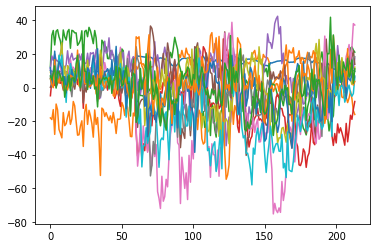

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from python_speech_features import mfcc
import scipy.io.wavfile as wav
for i in os.listdir("/content/clean_trainset_28spk_wav/")[0:5]:
  (rate,sig) = wav.read("/content/clean_trainset_28spk_wav/"+i)
  mfcc_feat = mfcc(sig,rate)

  print(mfcc_feat)
  plt.plot(mfcc_feat)
  plt.show()


In [ ]:
!pip install SpeechRecognition
!pip install python_speech_features

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for python-speech-features: filename=python_speech_features-0.6-py3-none-any.whl size=5888 sha256=4d9f15aadef9c45e44dcbe9e49711dbb94ed692983ca69810e68fd7c6e388347
  Stored in directory: /root/.cache/pip/wheels/b0/0e/94/28cd6afa3cd5998a63eef99fe31777acd7d758f59cf24839eb
Successfully built python-speech-features


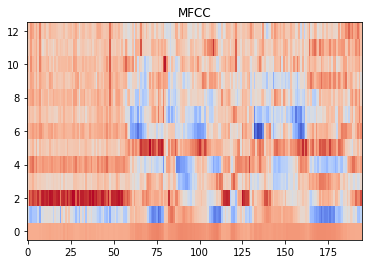

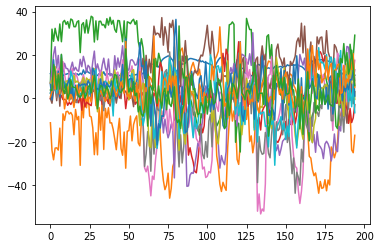

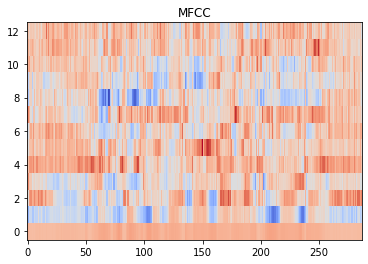

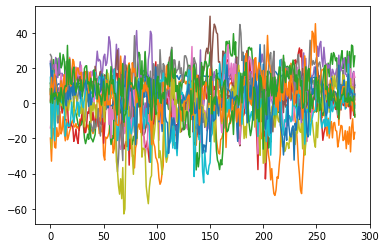

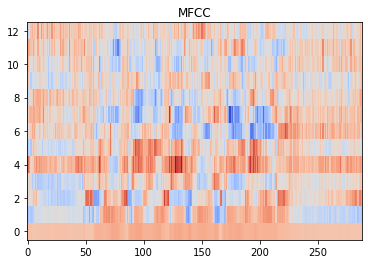

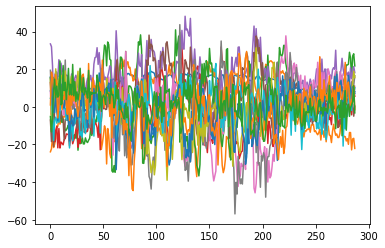

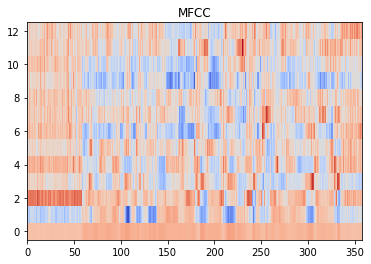

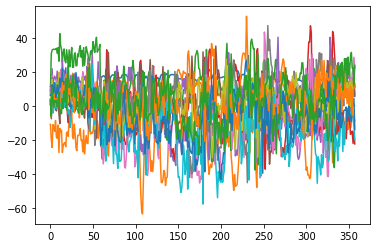

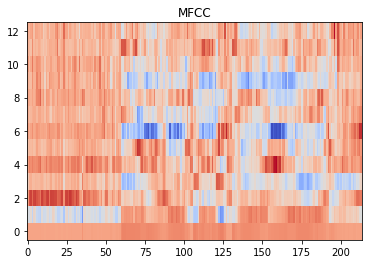

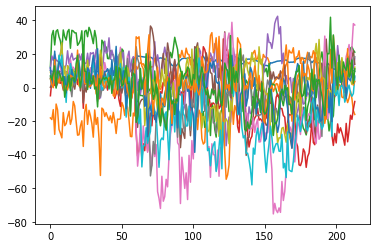

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

for i in os.listdir("/content/clean_trainset_28spk_wav/")[0:5]:
  (rate,sig) = wav.read("/content/clean_trainset_28spk_wav/"+i)
  mfcc_feat = mfcc(sig,rate)

  ig, ax = plt.subplots()
  mfcc_data= np.swapaxes(mfcc_feat, 0 ,1)
  cax = ax.imshow(mfcc_data, interpolation='nearest', cmap=cm.coolwarm, origin='lower', aspect='auto')
  ax.set_title('MFCC')
  #Showing mfcc_data
  plt.show()
  #Showing mfcc_feat
  plt.plot(mfcc_feat)
  plt.show()
